In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] =(8, 5)

# Seaborn
- matplotlib보다 많이 쓰는 이유는 **통계 기반 plot**을 손쉽게 그릴 수 있기 때문
- matplotlib으로 집계된 데이터 (통계 기반 데이터)를 시각화를 하고 싶다면?
  - groupby 또는 pivot_table을 만들어서 시각화를 해야합니다.
  - 카테고리별 분류를 하기 위해서는 plot을 각각 그려야 한다.
  - 단순하게 임의의 데이터만을 시각화해서 빠르게 보고 싶을 때 : matplotlib, seaborn
    - 통계적인 시각화가 필요 없을 때
  - 데이터 프레임 기반의 통계를 사용한 시각화를 해보고 싶을 때: seaborn


# 통계기반 plot

In [3]:
# seaborn에서 제공하는 샘플 데이터셋 가져오기
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


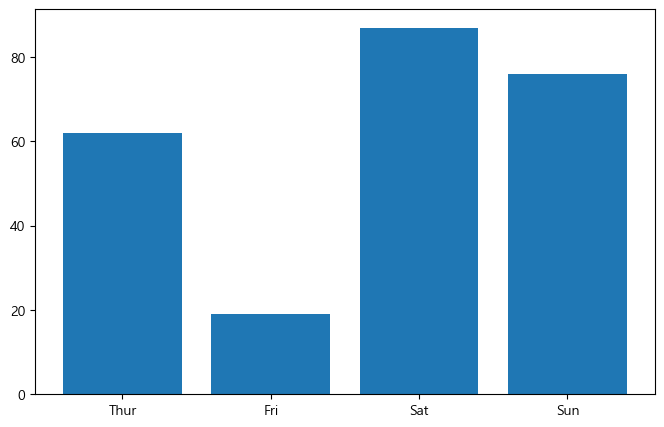

In [4]:
# 1. 요일별 식사한 테이블 수 
df_by_day_count = tips.groupby("day")["total_bill"].count()
plt.bar(df_by_day_count.index, df_by_day_count)
plt.show()

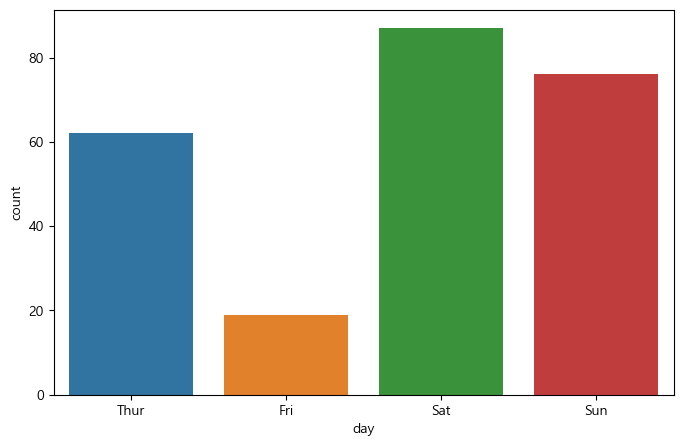

In [5]:
# seaborn을 활용
sns.countplot(x=tips['day'])
plt.show()

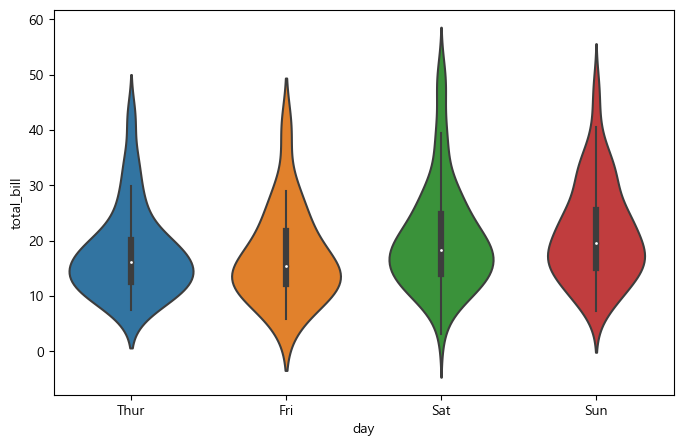

In [6]:
# x : x축에 표시할 컬럼, y : y축에 표시할 컬럼, data : 데이터 프레임
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

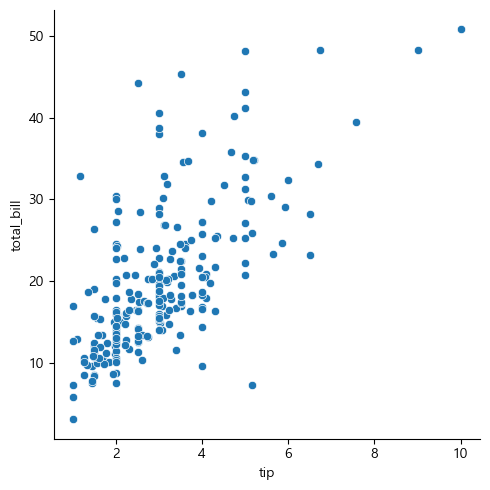

In [7]:
sns.relplot(x='tip', y='total_bill', data=tips)
plt.show()

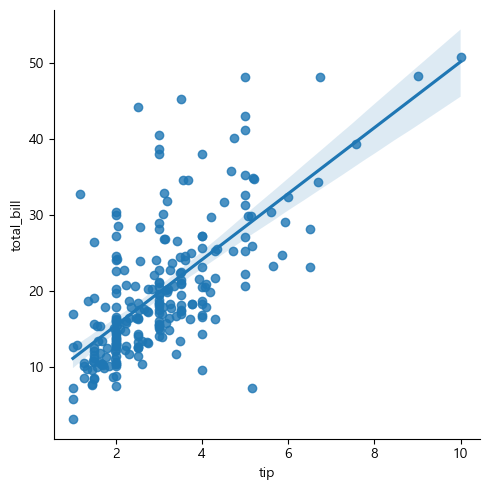

In [8]:
sns.lmplot(x='tip', y='total_bill', data=tips)
plt.show()

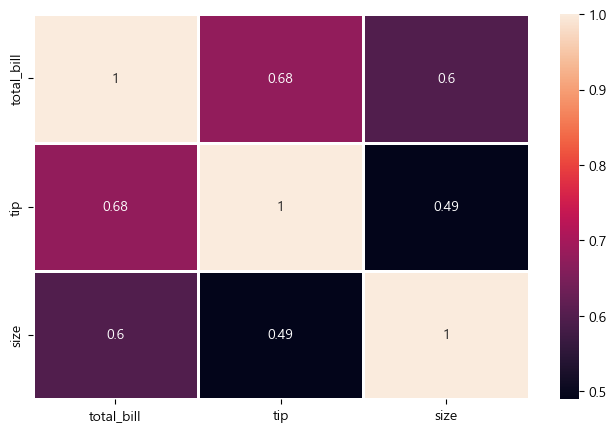

In [9]:
sns.heatmap(tips.corr(), annot=True, linewidths=1)
plt.show()

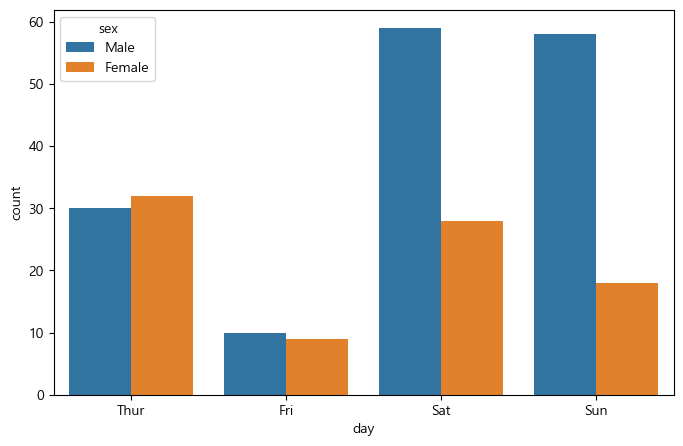

In [10]:
# seaborn을 활용하면?
sns.countplot(x=tips['day'], data=tips, hue='sex')
plt.show()  

## 스타일링

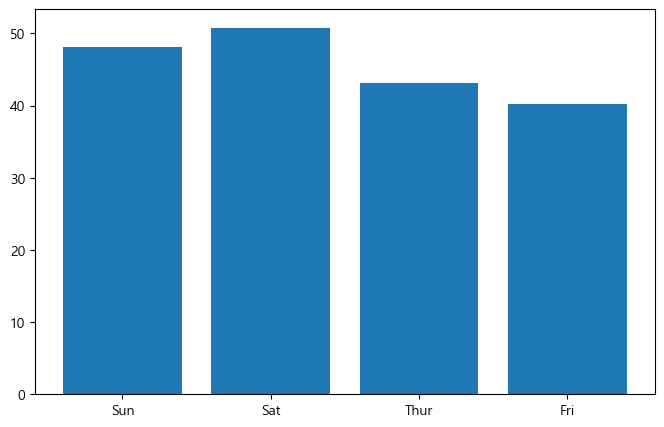

In [11]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

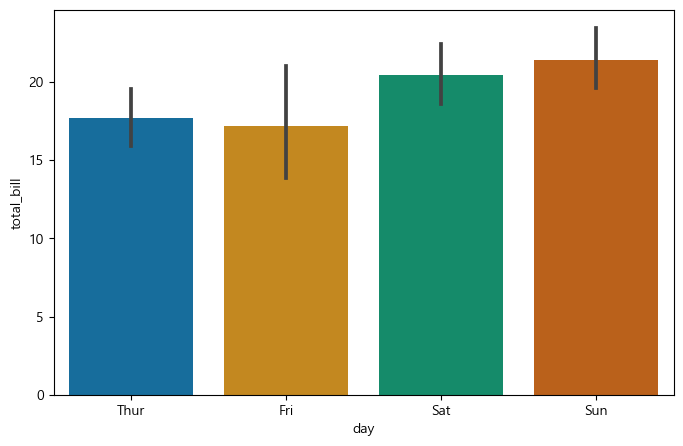

In [12]:
sns.barplot(x='day', y='total_bill', data=tips, palette='colorblind')
plt.show()

## 컬러 팔레트

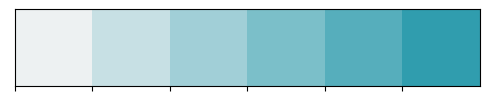

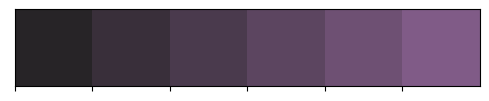

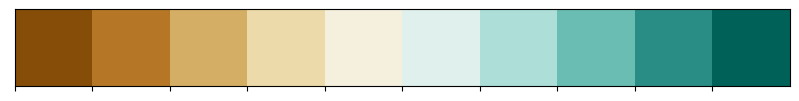

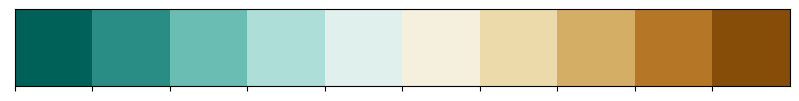

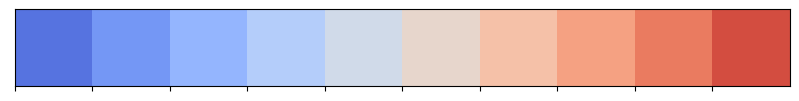

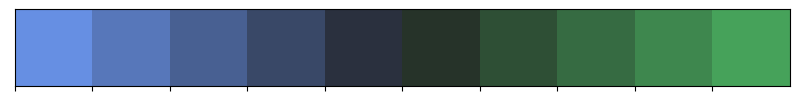

In [13]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

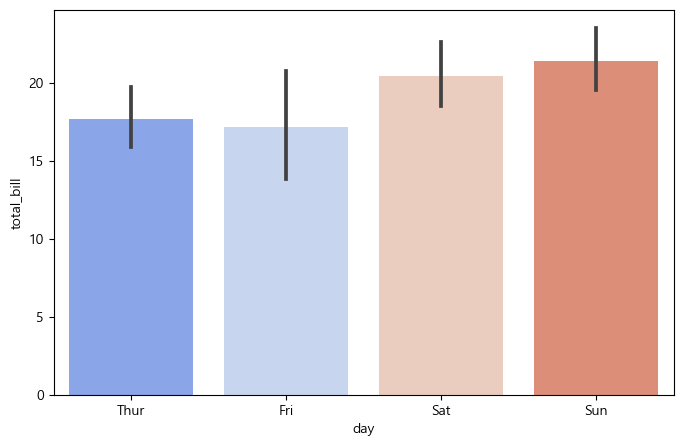

In [14]:
sns.barplot(x='day', y='total_bill', data=tips, palette="coolwarm")
plt.show()

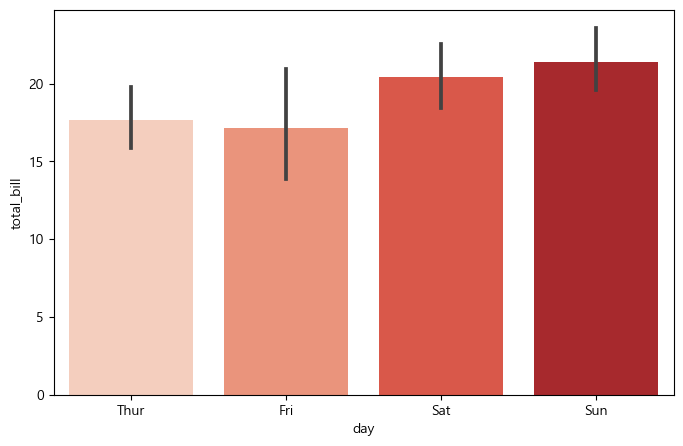

In [15]:
sns.barplot(x='day', y='total_bill', data=tips, palette="Reds")
plt.show()

## pandas 데이터 프레임과 호환성

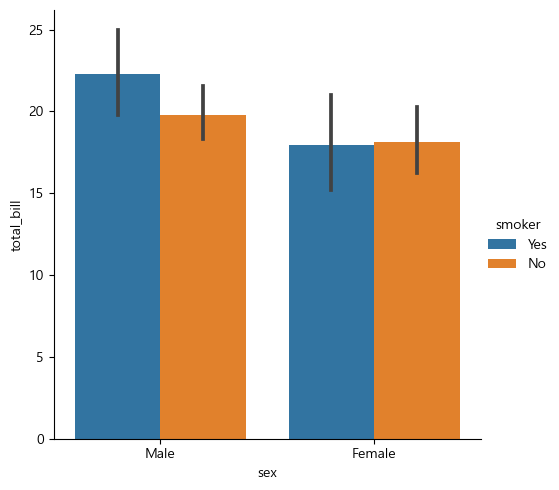

In [16]:
sns.catplot(
    x='sex',
    y='total_bill',
    data=tips,
    kind='bar',
    hue='smoker'
)

plt.show()

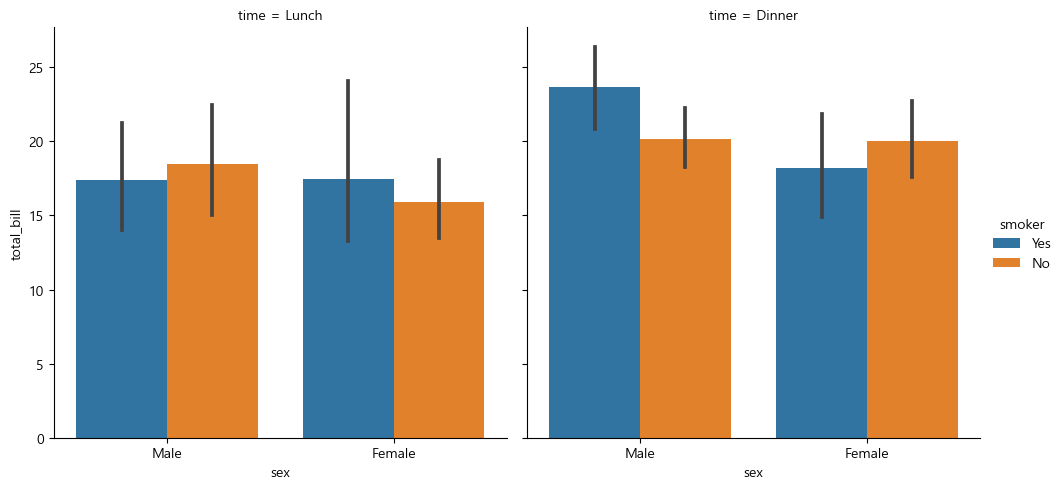

In [17]:
sns.catplot(
    x='sex',
    y='total_bill',
    data=tips,
    kind='bar',
    hue='smoker',
    col="time" # 그래프 자체를 분할 주기
)
plt.show()

실습용 데이터셋
* `titanic` : 타이타닉 사망자 / 생존자 데이터셋
* `tips` : 식당 데이터셋

In [18]:
titanic = sns.load_dataset('titanic')
tips    = sns.load_dataset('tips')

In [19]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**타이타닉 데이터셋 설명**
* survived: 생존여부
* pclass: 좌석등급
* sex: 성별
* age: 나이
* sibsp: 형제자매 + 배우자 숫자
* parch: 부모자식 숫자
* fare: 요금
* embarked: 탑승 항구
* class: 좌석등급 (영문)
* who: 사람 구분
* deck: 데크
* embark_town: 탑승 항구 (영문)
* alive: 생존여부 (영문)
* alone: 혼자인지 여부

# Countplot
* 항목별 개수를 세어주는 시각화 방법
* 알아서 컬럼을 구성하고 있는 value들을 구분해서 보여준다.

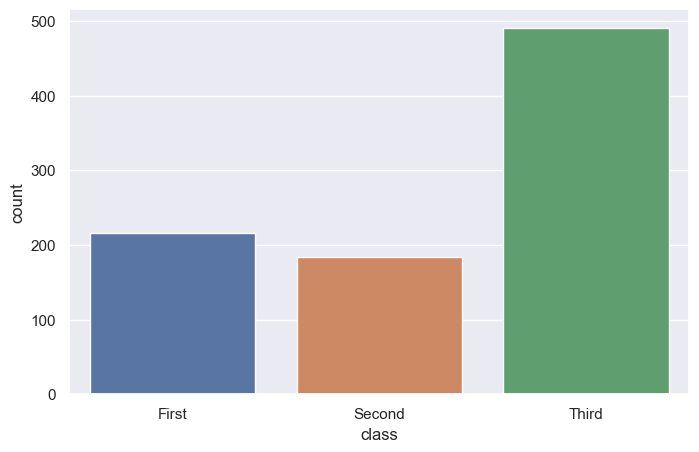

In [21]:
sns.set(style='darkgrid') # 모든 시각화 배경을 회색 그리드로 보여주는 옵션
sns.countplot(x='class', data=titanic) # titatnic 데이터셋에서 class(좌석등급)마다의 개수를 시각화
plt.show()

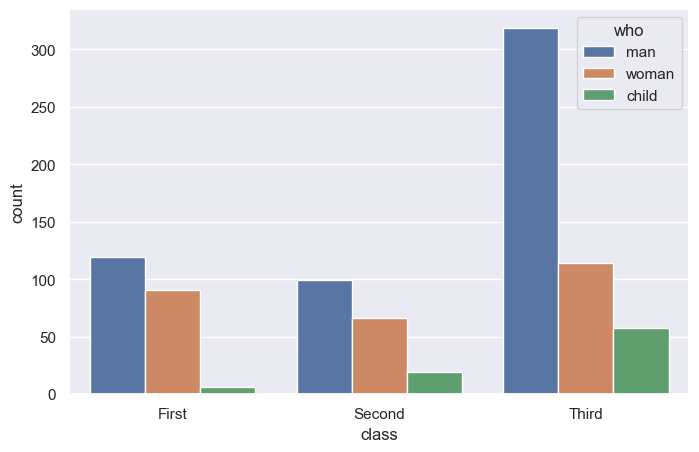

In [22]:
sns.countplot(x='class', data=titanic, hue='who')
plt.show()

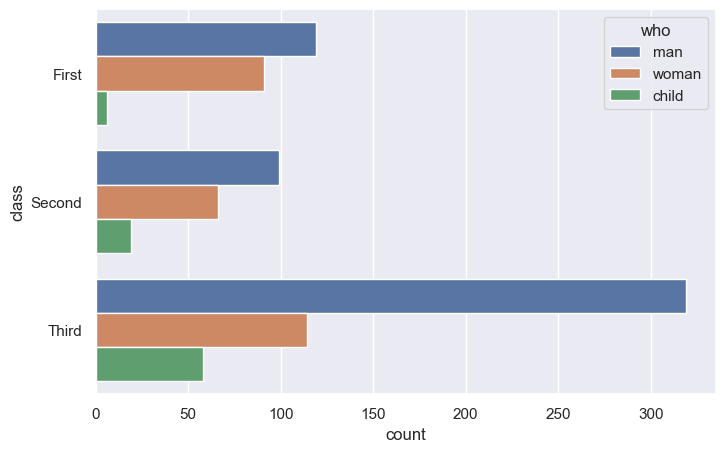

In [23]:
sns.countplot(y='class', hue='who', data=titanic) # y를 사용하여 가로로 그리기
plt.show()

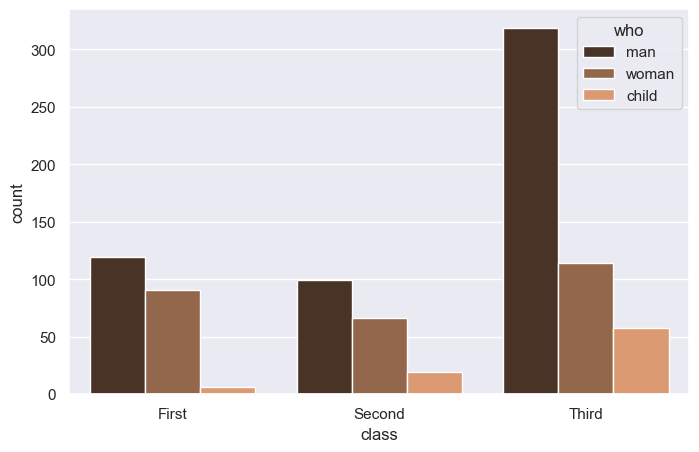

In [24]:
sns.countplot(x='class', hue='who', data=titanic, palette='copper') # 색상 팔레트 지정
plt.show()

# distplot
- matplotlib의 `hist` 그래프 + `kdeplot`을 통합한 그래프
- **분포와 밀도**를 확인할 수 있다.

In [60]:
# 임의의 샘플 데이터 생성
N = 100000

x = np.random.randn(N) # 10만개의 정규분포 랜덤값

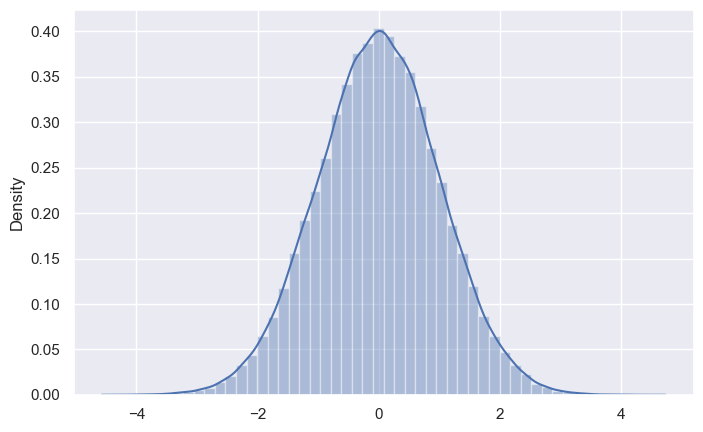

In [61]:
sns.distplot(x)
plt.show()

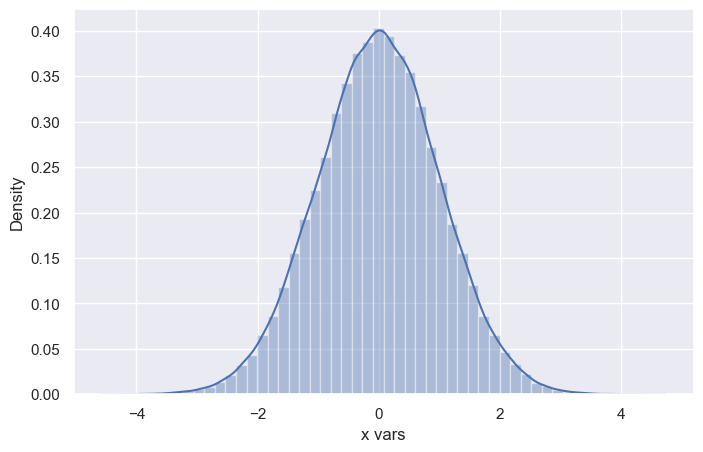

In [62]:
# 데이터가 series인 경우
x = pd.Series(x, name="x vars")
sns.distplot(x)
plt.show()

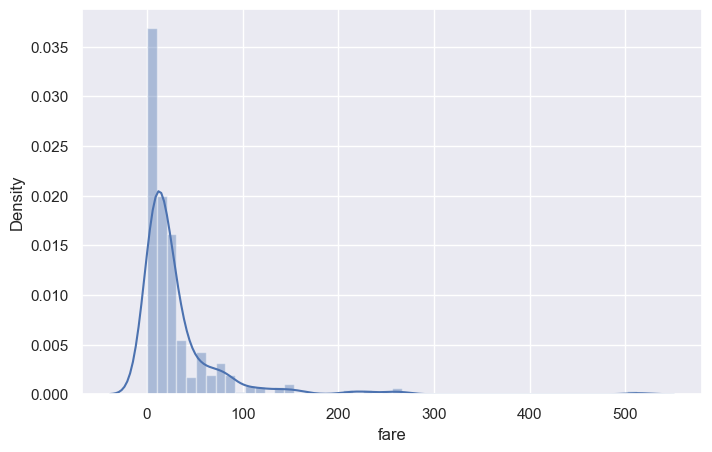

In [28]:
# 타이타닉 데이터셋에서 요금 distplot 그려보기
sns.distplot(titanic["fare"])
plt.show()

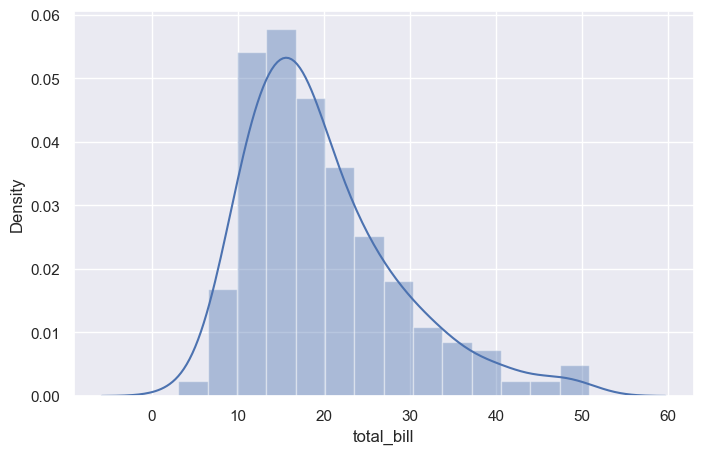

In [29]:
# tips의 total_bill distplot 그려보기
sns.distplot(tips['total_bill'])
plt.show()

# rugplot
- `rug`는 `rugplot`이라고도 불리며, 데이터의 위치를 x축 위에 작은 선분(rug)으로 나타낸다.
- 데이터의 위치와 분포를 보여준다.

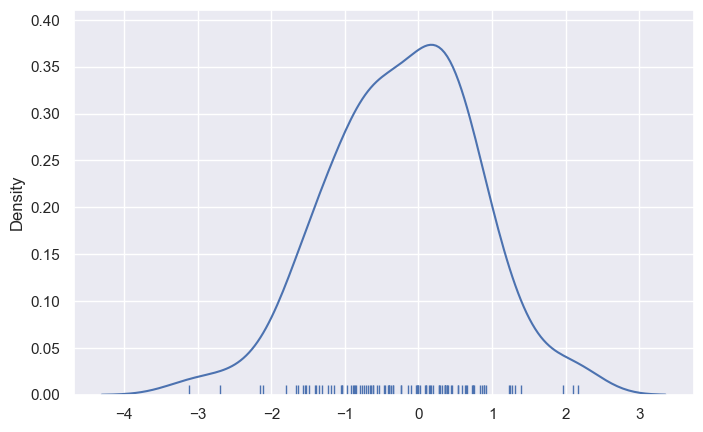

In [65]:
x = np.random.randn(100)

sns.distplot(x, rug=True, hist=False)
plt.show()

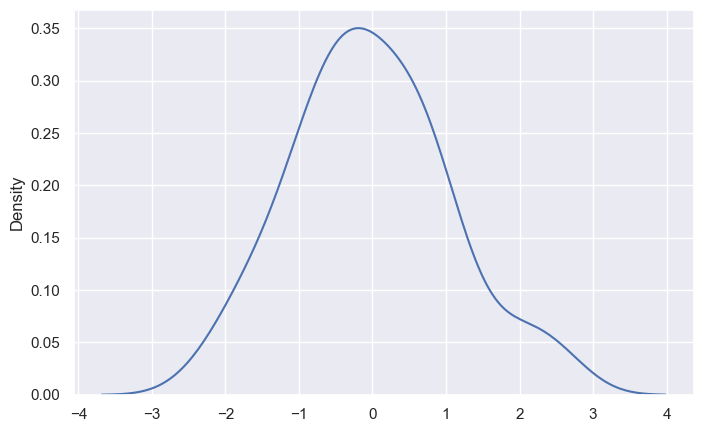

In [31]:
sns.distplot(x, rug=False, hist=False, kde=True) # kde : 커널 밀도 추정
plt.show()

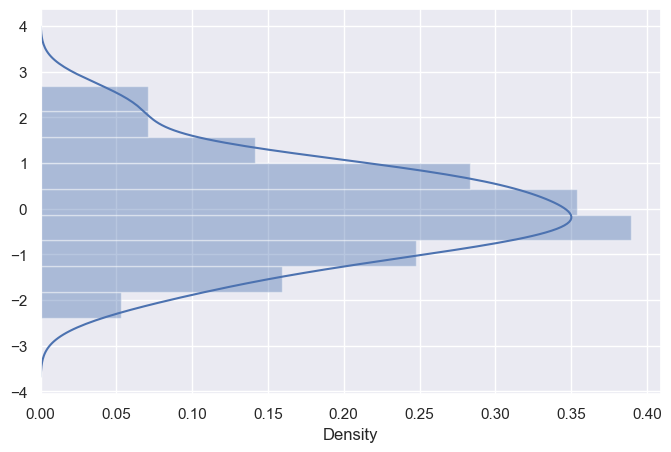

In [32]:
sns.distplot(x, vertical=True) # 가로로 표현
plt.show()

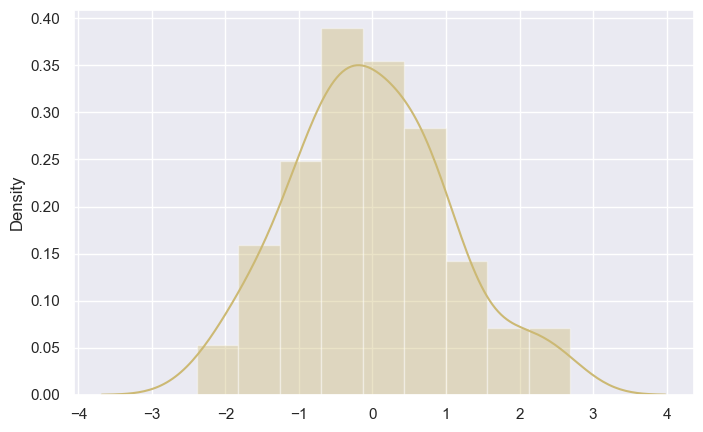

In [33]:
sns.distplot(x, color='y') # 컬러 변경
plt.show()

# heatmap
* 데이터의 크기를 색상의 농도로 표현해주는 기법

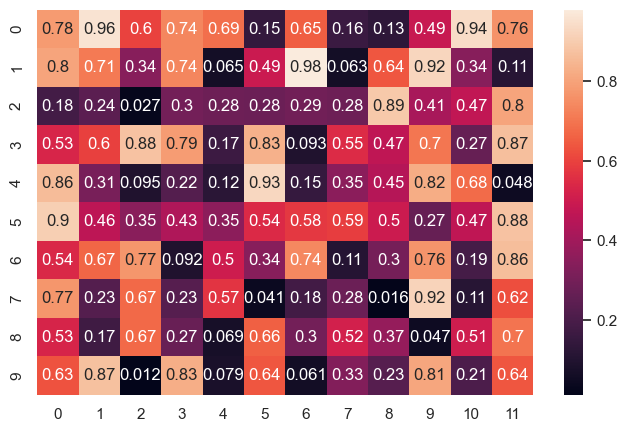

In [67]:
x = np.random.rand(10, 12)
sns.heatmap(x, annot=True) # annot=True 숫자 넣기
plt.show()

In [35]:
# pivot table을 활용하여 히트맵 그리기
pivot = tips.pivot_table(index='day', columns='size', values='tip') # 요일별 방문인원의 팁의 평균
pivot

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


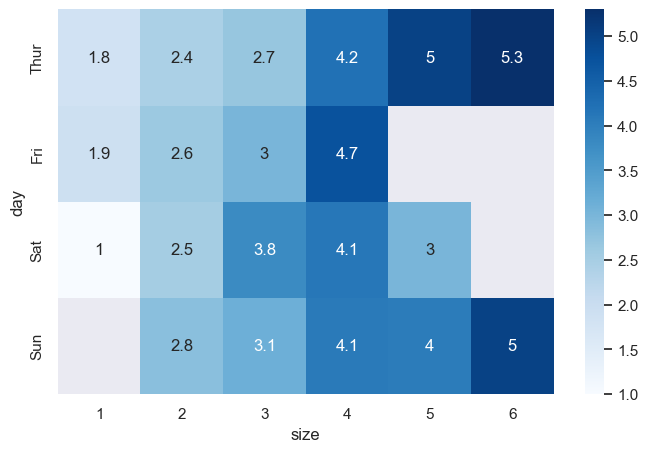

In [36]:
sns.heatmap(pivot, cmap='Blues', annot=True)
plt.show()

## correlation(상관관계) 시각화

In [37]:
titanic.corr() # pandas의 corr() 함수는 데이터들끼리의 상관관계를 보여준다.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


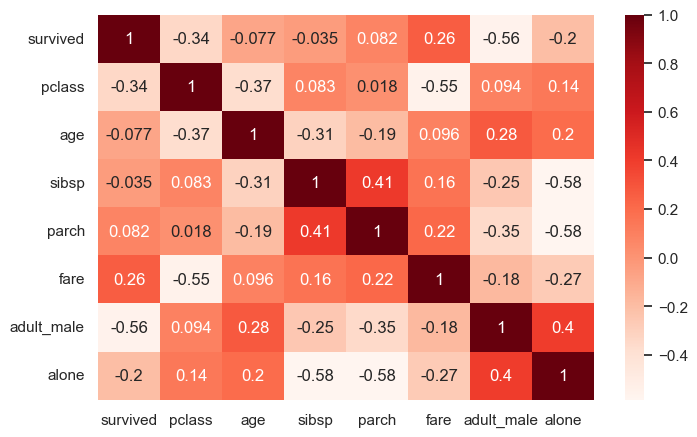

In [38]:
sns.heatmap(titanic.corr(), annot=True, cmap="Reds")
plt.show()

# pairplot
- pairplot은 그리드 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그린다.
  - 집합(데이터)의 조합
    - `tips` & `total_bill`의 조합
    - `size` & `total_bill`의 조합
    - `tips` & `size`의 조합
- 숫자형 column에 대해서만 그려준다.

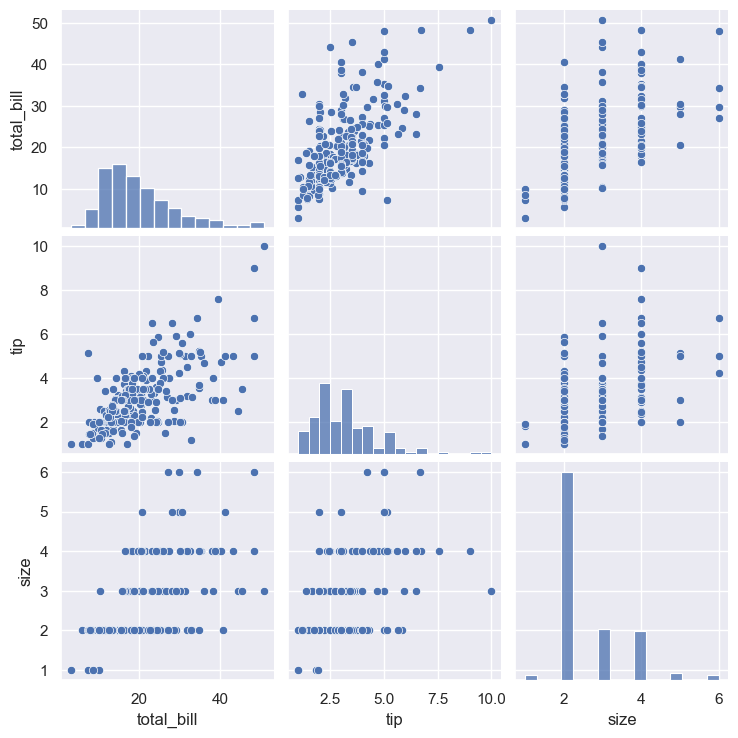

In [39]:
sns.pairplot(tips)
plt.show()

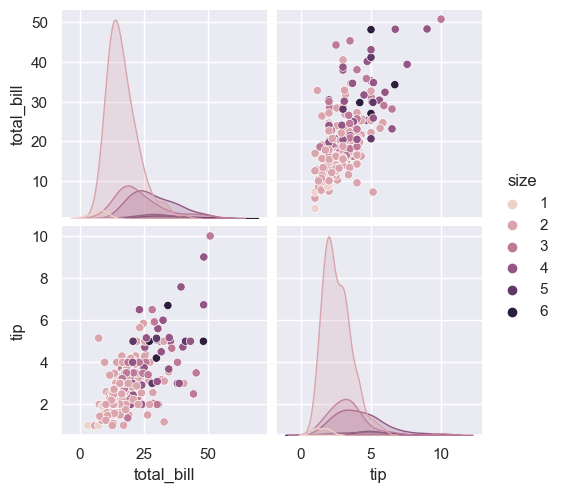

In [40]:
sns.pairplot(tips, hue='size') # hue 옵션으로 특성 구분
plt.show()

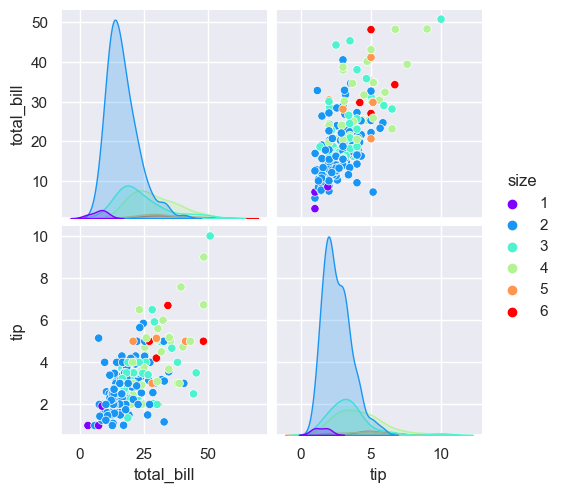

In [41]:
sns.pairplot(tips, hue='size', palette='rainbow') # 컬러 팔레트 적용
plt.show()

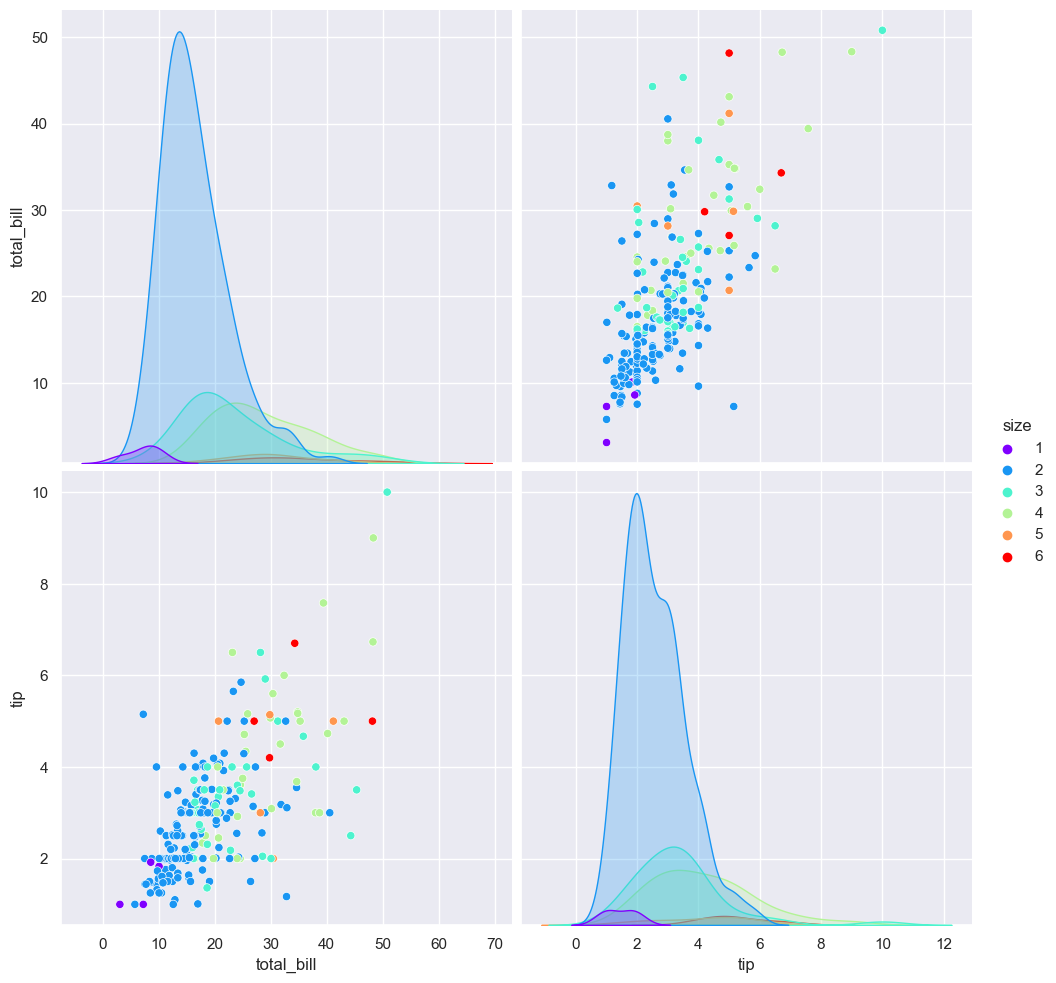

In [68]:
sns.pairplot(tips, hue='size', palette='rainbow', height=5) # 사이즈 적용
plt.show()

# violinplot
- column에 대한 데이터의 **비교 분포도**를 확인
  - kde와 거의 비슷하지만 그래프가 대칭으로 되어있다.
  - kde는 density(밀집도), violinplot은 실제 값의 빈도
- 곡선으로 되어있는 뚱뚱한 부분은 데이터의 분포
- 양쪽 끝 뾰족한 부분은 데이터의 최소와 최대를 나타낸다.

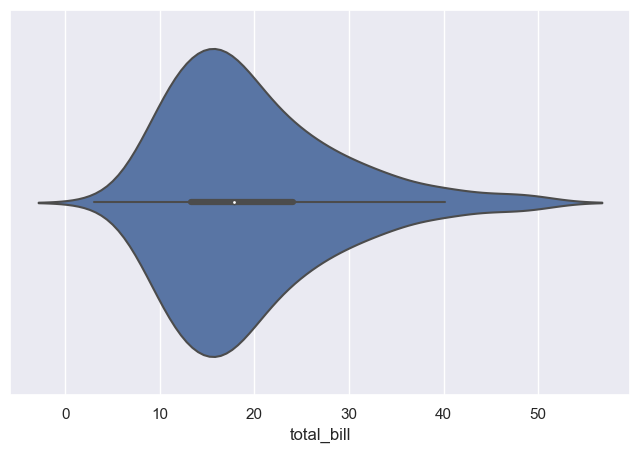

In [43]:
sns.violinplot(x=tips['total_bill'])
plt.show()

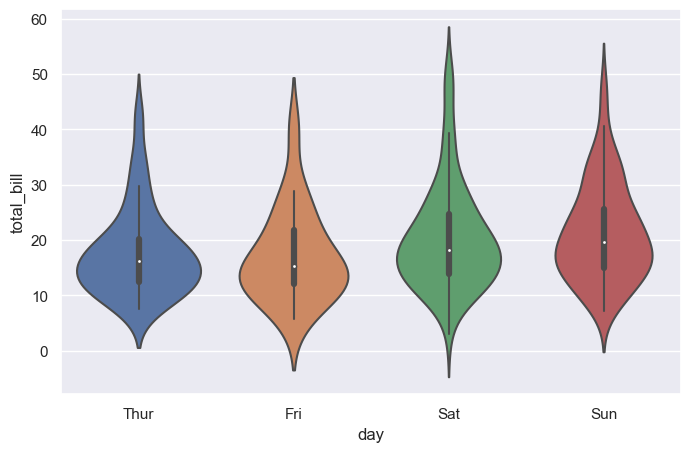

In [44]:
# 요일별 지불 가격의 비교 분포를 보고 싶다.
# x : day, y = total_bill
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

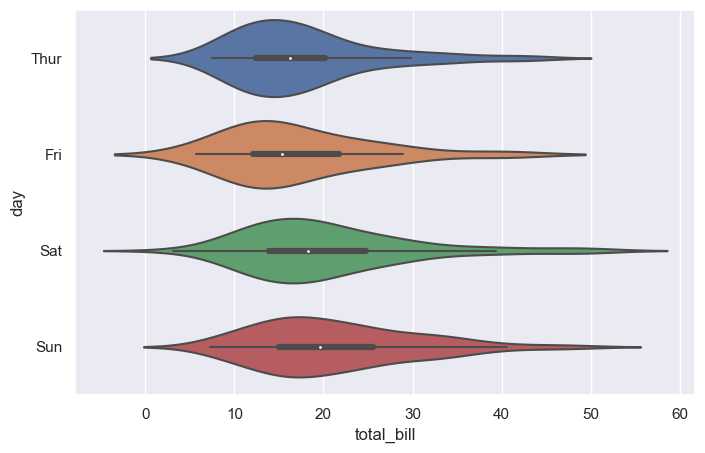

In [45]:
sns.violinplot(y='day', x='total_bill', data=tips) # 가로로 표현
plt.show()

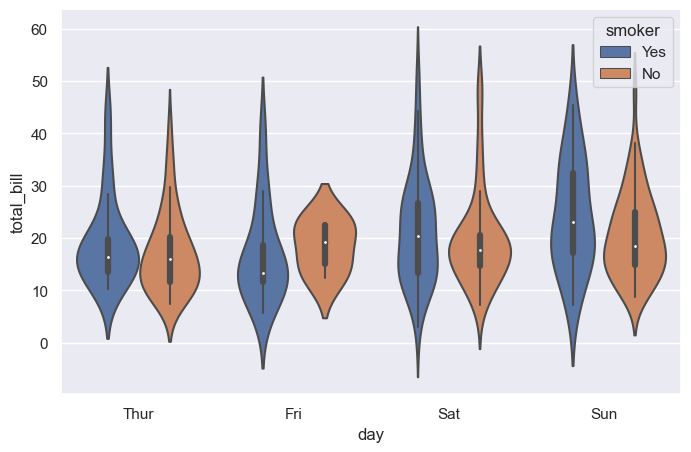

In [46]:
# hue 옵션으로 비교
# hue 옵션을 사용하지 않으면 바이올린이 대칭이기 때문에 KDE로 보는 것과 큰 차이가 없다.
# hue 옵션을 부여하면 단일 컬럼에 대한 바이올린 모양의 비교를 할 수 있다.  
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker')
plt.show()

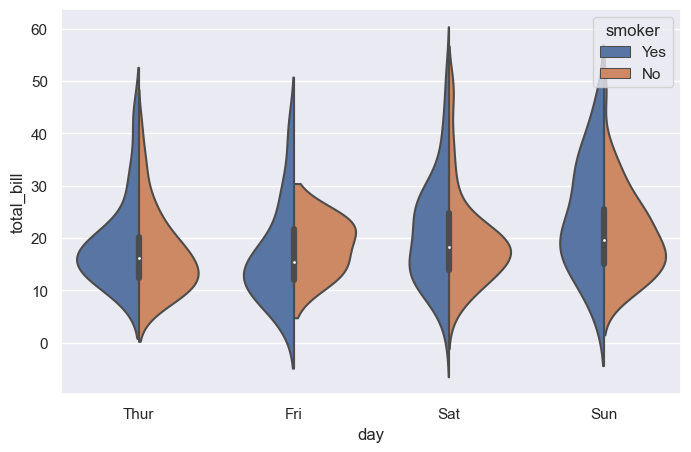

In [47]:
# hue 옵션으로 분할된 바이올린 플롯을 각각 합치고 싶으시면 split=True를 주면 된다.
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', split=True)
plt.show()

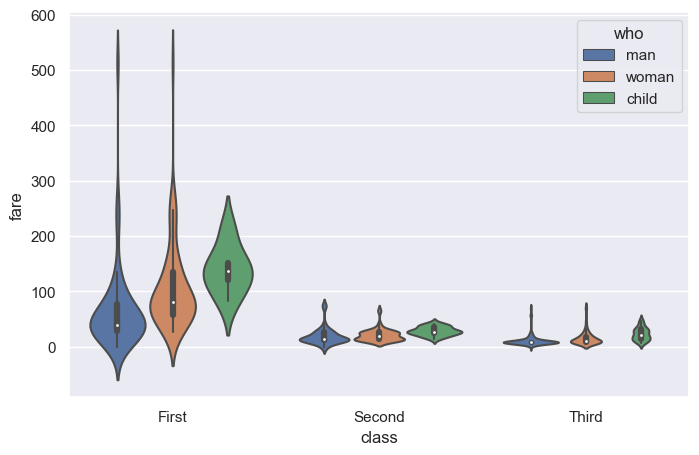

In [48]:
# hue의 구분 값이 3개 이상이면 split 사용 불가
sns.violinplot(x='class', y='fare' ,data=titanic, hue='who')
plt.show()

# lmplot
- lmplot은 컬럼간의 선형관계를 확인하기에 용이

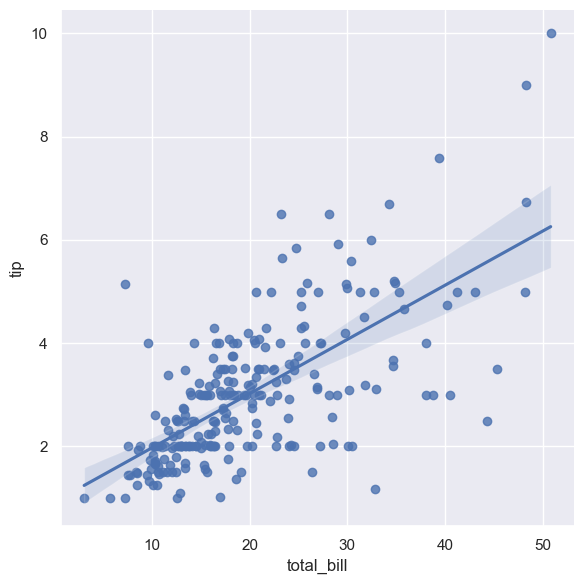

In [49]:
sns.lmplot(x='total_bill', y='tip', height=6, data=tips)
plt.show()

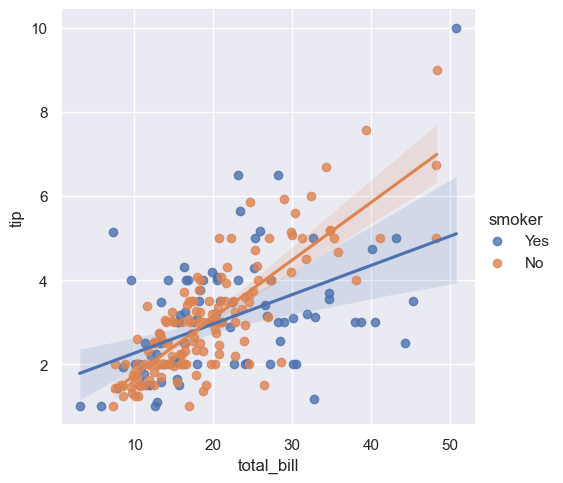

In [50]:
# hue 옵션으로 다중 선형관계 그리기
sns.lmplot(x='total_bill', y='tip', hue='smoker', height=5, data=tips)
plt.show()

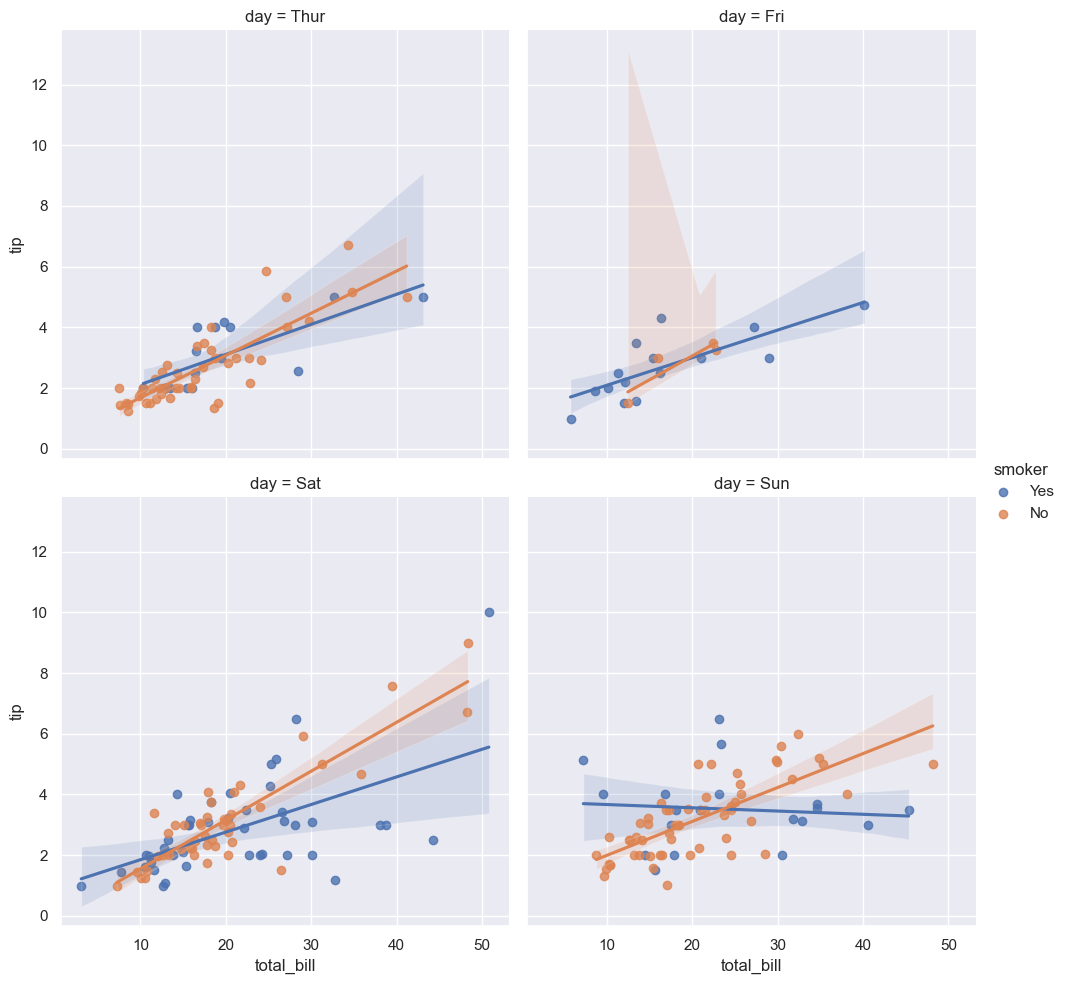

In [51]:
# col_wrap 옵션을 이용해 한 줄(row)에 표기할 컬럼의 개수 명시 가능
sns.lmplot(x='total_bill', y='tip', hue='smoker',  data=tips, col='day', col_wrap=2)
plt.show()

# relplot
- 두 컬럼간의 상관관계를 보지만 lmplot 처럼 선형관계를 그려주지는 않는다.

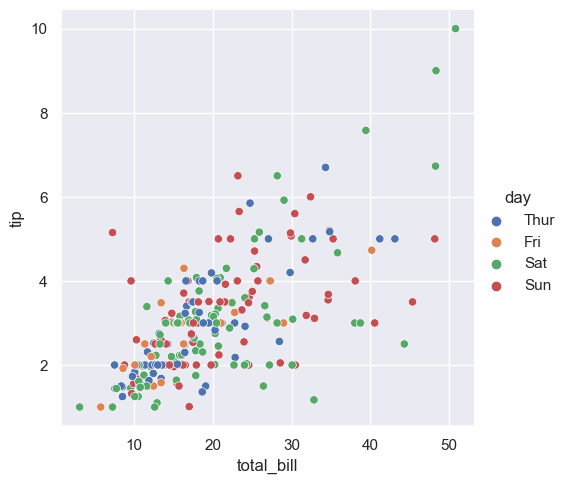

In [52]:
sns.relplot(x='total_bill', y='tip', hue='day', data=tips)
plt.show()

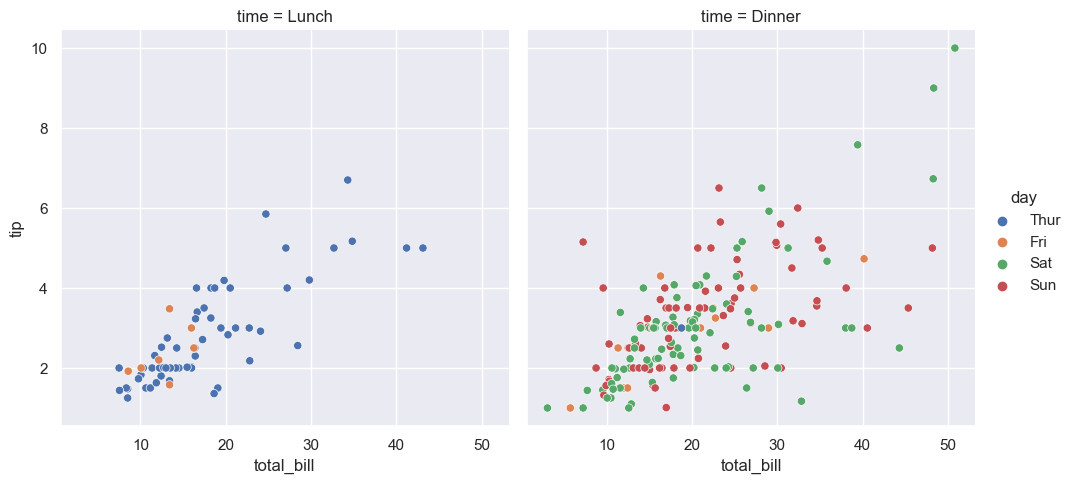

In [53]:
# col 옵션으로 그래프 분할
sns.relplot(x='total_bill', y='tip', hue='day', col='time', data=tips)
plt.show()

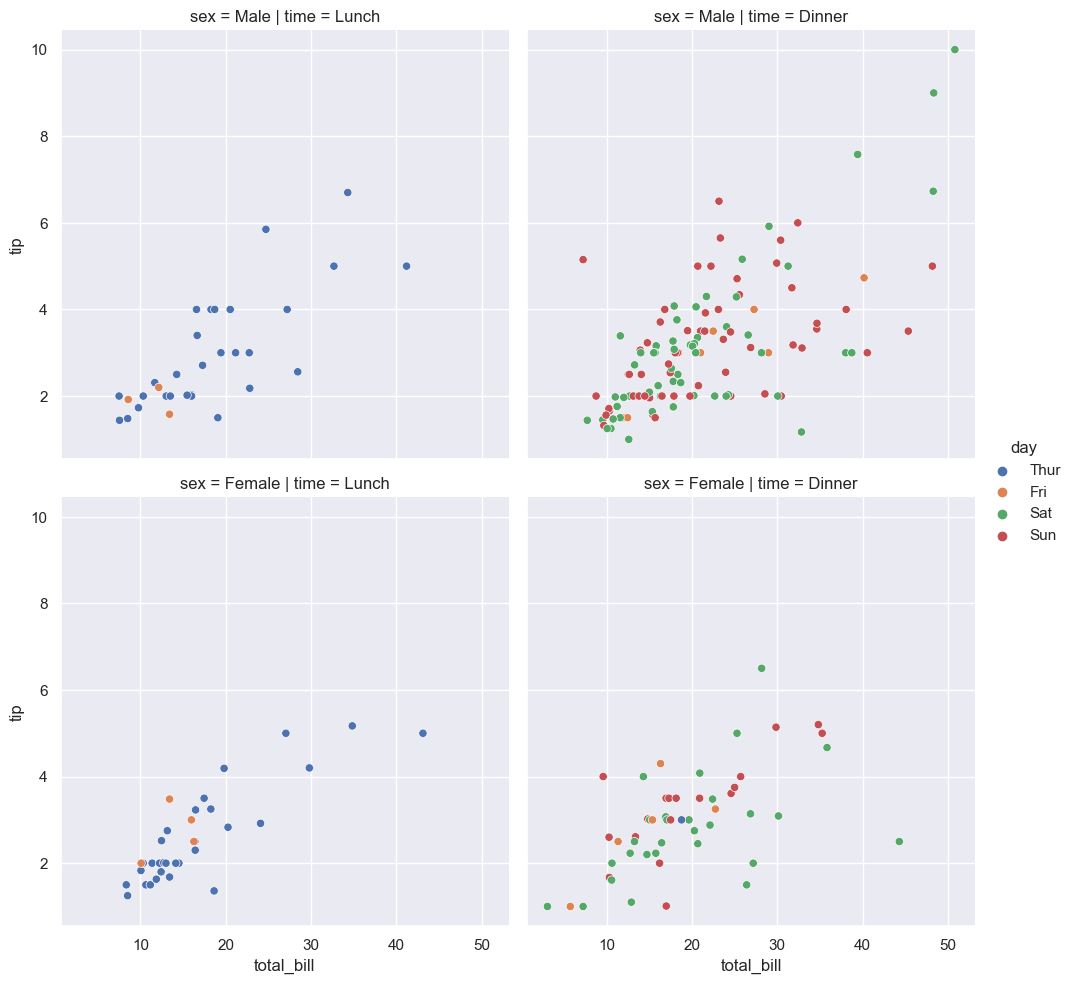

In [54]:
# 그래프의 row와 column에 표기할 컬럼을 선택
sns.relplot(x='total_bill', y='tip', hue='day', row='sex', col='time', data=tips)
plt.show()

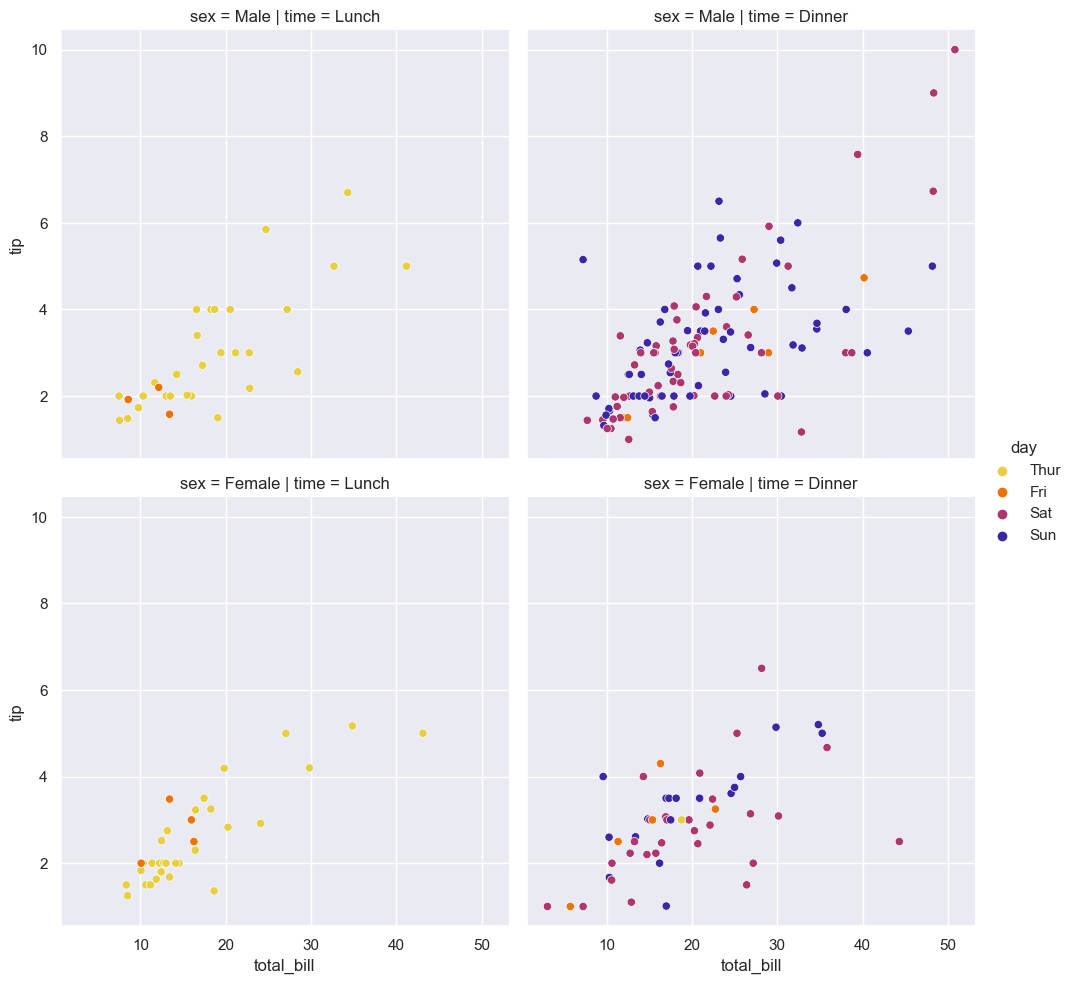

In [55]:
#  컬러 팔레트 적용
sns.relplot(x='total_bill', y='tip', hue='day', row='sex', col='time', data=tips, palette='CMRmap_r')
plt.show()

# jointplot
- scatter, histogram을 동시에 그려준다.
- 숫자형 데이터만 표현이 가능하다.

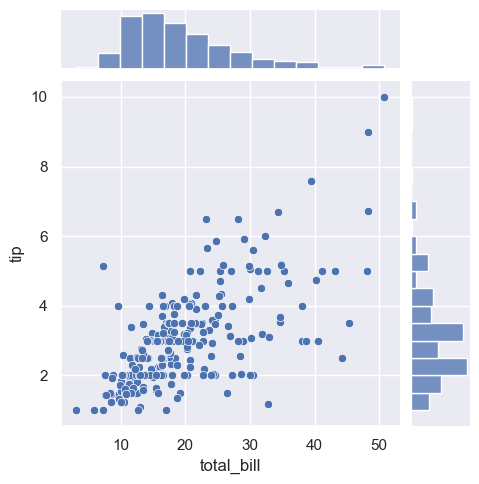

In [56]:
sns.jointplot(x='total_bill', y='tip', height=5, data=tips)
plt.show()

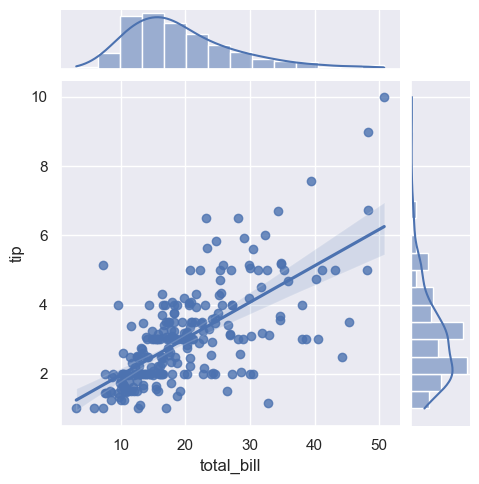

In [57]:
# kind='reg': 선형관계를 표현해주는 regression 라인 추가
sns.jointplot(x="total_bill", y="tip", height=5, data=tips, kind='reg') # hue 사용 불가
plt.show()

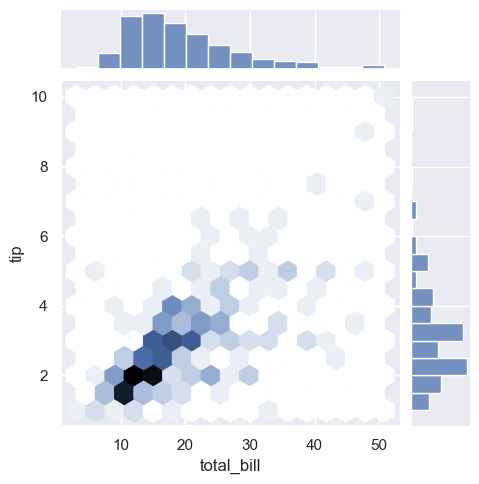

In [58]:
# kind='hex' 옵션을 이용해 육각형(hex)모양의 밀도 확인
sns.jointplot(x="total_bill", y="tip", height=5, data=tips, kind='hex')
plt.show()

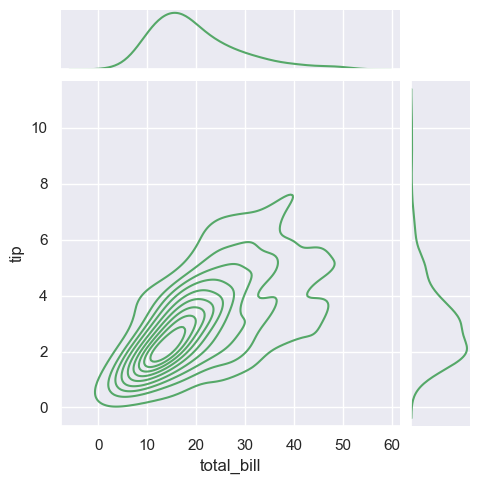

In [59]:
# kind='kde' 옵션으로 밀집도를 선으로 확인
sns.jointplot(x="total_bill", y="tip", height=5, data=tips, kind='kde', color='g')
plt.show()